In [ ]:
import pandas as pd

data= pd.read_csv('MuestreoPro.csv')
data.groupby('Output').count()

,AccelX,AccelY,AccelZ
Output,,,
BACKWARD,544,544,544
FOWARD,928,928,928
LEFT,544,544,544
RIGTH,547,547,547
STOP,588,588,588


In [ ]:
Accel = data.iloc[:, 0 : 3]
Accel

,AccelX,AccelY,AccelZ
0,-3164.0,-15760.0,5204.0
1,-3584.0,-16048.0,5220.0
2,-3624.0,-16000.0,5048.0
3,-3016.0,-15944.0,5384.0
4,-3572.0,-15952.0,4916.0
...,...,...,...
3146,-14616.0,1144.0,-168.0
3147,-14880.0,776.0,-500.0
3148,-15376.0,900.0,-808.0
3149,-14816.0,868.0,-576.0


In [ ]:
Output = data.iloc[:, -1].values
Output

array(['FOWARD', 'FOWARD', 'FOWARD', ..., 'RIGTH', 'RIGTH', 'RIGTH'],
      dtype=object)

In [ ]:
mean = Accel.mean()
std = Accel.std()
norm = (Accel-mean)/std
mean

AccelX    -821.626150
AccelY    -773.524595
AccelZ    5833.392574
dtype: float64

In [ ]:
Output = pd.get_dummies(data['Output'])
Output.head()

,BACKWARD,FOWARD,LEFT,RIGTH,STOP
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [ ]:
x = norm.iloc[:,:].values
y = Output

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
input_shape = x_train[0].shape
input_shape

(3,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=input_shape))
model.add(Dense(units=4, activation='relu'))

model.add(Dense(units=5, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
res = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
63/63 [==============================] - 1s 6ms/step - loss: 1.5045 - accuracy: 0.2976 - val_loss: 1.4600 - val_accuracy: 0.2738
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 1.3938 - accuracy: 0.3953 - val_loss: 1.3543 - val_accuracy: 0.4385
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 1.2766 - accuracy: 0.4722 - val_loss: 1.2368 - val_accuracy: 0.4385
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 1.1388 - accuracy: 0.4722 - val_loss: 1.0936 - val_accuracy: 0.4385
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.9834 - accuracy: 0.5813 - val_loss: 0.9424 - val_accuracy: 0.8155
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.8350 - accuracy: 0.8338 - val_loss: 0.8124 - val_accuracy: 0.8155
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.7175 - accuracy: 0.8304 - val_loss: 0.7152 - val_accuracy: 0.8155
Epoch 8/50
63/63 [==

In [ ]:
hist = res.history
loss = hist['loss']
val_loss = hist['val_loss']

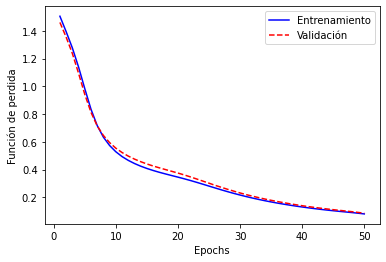

In [ ]:
from matplotlib import pyplot as plt

epochs = range(1, len(loss) + 1)

plt.ylabel('Función de perdida')
plt.xlabel('Epochs')
plt.plot(epochs, loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', linestyle='dashed', label='Validación')
plt.legend()

In [ ]:
model.evaluate(x_test, y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 1.0000


[0.08223158121109009, 1.0]

In [ ]:
capas_0 = model.layers[0].get_weights()
capas_1 = model.layers[1].get_weights()
capas_2 = model.layers[2].get_weights()
print(capas_0)
print(capas_1)
print(capas_2)

[array([[ 1.2793931 , -2.0062783 , -0.18659946, -1.427197  ],
       [-1.5082104 , -0.2803596 ,  2.3663912 , -1.3072441 ],
       [-0.71957517, -2.0481827 , -1.4083885 , -1.4801996 ]],
      dtype=float32), array([1.1205801, 1.1072226, 0.8795427, 0.8877593], dtype=float32)]
[array([[-0.702988  , -0.41443393,  0.3608912 , -1.6562395 ],
       [-0.65790796, -0.21105331,  1.6203163 ,  0.90416664],
       [-0.6156573 , -0.64176875, -0.6271087 ,  2.3436387 ],
       [-0.08356047, -0.8395576 ,  1.4555458 ,  0.19343181]],
      dtype=float32), array([ 0.0000000e+00,  0.0000000e+00, -1.3071578e-05,  1.9729731e+00],
      dtype=float32)]
[array([[ 0.47779572, -0.3149395 ,  0.5251503 ,  0.06824434, -0.42755955],
       [-0.42915836, -0.62002426, -0.14078307, -0.5238595 ,  0.52906644],
       [-0.97364897,  1.2581552 , -0.2090279 ,  0.5890479 , -0.8780702 ],
       [ 0.8831741 , -1.3865776 , -2.041072  , -0.176316  ,  0.4500639 ]],
      dtype=float32), array([-2.1144717, -1.2679216,  2.159766 , 

In [ ]:
model.evaluate(x_test, y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 1.0000


[0.08223158121109009, 1.0]

In [ ]:
import numpy as np
accel = [-380	 -16512  5000]
fake = (accel-mean)/std
fake = fake.values
x_test[0] = fake
model.predict(x_test)[0]

SyntaxError: ignored